<img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" height=300 width=300 />


# Final Project: League of Legends Match Predictor 


### Introduction  

League of Legends, a popular multiplayer online battle arena (MOBA) game, generates extensive data from matches, providing an excellent opportunity to apply machine learning techniques to real-world scenarios. Perform the following steps to build a logistic regression model aimed at predicting the outcomes of League of Legends matches.  

Use the [league_of_legends_data_large.csv](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/rk7VDaPjMp1h5VXS-cUyMg/league-of-legends-data-large.csv) file to perform the tasks.  

### Step 1: Data Loading and Preprocessing  

#### Task 1: Load the League of Legends dataset and preprocess it for training.  

Loading and preprocessing the dataset involves reading the data, splitting it into training and testing sets, and standardizing the features. You will utilize `pandas` for data manipulation, `train_test_split` from `sklearn` for data splitting, and `StandardScaler` for feature scaling.  

Note: Please ensure all the required libraries are installed and imported.

1 .Load the dataset:
Use `pd.read_csv()` to load the dataset into a pandas DataFrame.</br>
2. Split data into features and target: Separate win (target) and the remaining columns (features).</br>
   X = data.drop('win', axis=1)</br>
   y = data['win'] </br>
3 .Split the Data into Training and Testing Sets:
Use `train_test_split()` from `sklearn.model_selection` to divide the data. Set `test_size`=0.2 to allocate 20% for testing and 80% for training, and use `random_state`=42 to ensure reproducibility of the split.</br>
4. Standardize the features:
Use `StandardScaler()` from sklearn.preprocessing to scale the features.</br>
5. Convert to PyTorch tensors:
Use `torch.tensor()` to convert the data to PyTorch tensors.

#### Exercise 1:  

Write a code to load the dataset, split it into training and testing sets, standardize the features, and convert the data into PyTorch tensors for use in training a PyTorch model.  


### Setup
Installing required libraries:

The following required libraries are not pre-installed in the Skills Network Labs environment. You will need to run the following cell to install them:


In [1]:
%%time
%pip install pandas scikit-learn matplotlib
%pip install torch==2.8.0+cpu torchvision==0.23.0+cpu torchaudio==2.8.0+cpu \
    --index-url https://download.pytorch.org/whl/cpu


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.9/10.9 MB 93.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.9/8.9 MB 111.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 83.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.0/5.0 MB 77.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 83.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.6/16.6 MB 150.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 129.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.0/35.0 MB 82.7 MB/s eta 0:00:00:00:01
Note: you may need to restart the kernel to use updated packages.
Looking in indexes: https://download.pytorch.org/whl/cpu
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 183.9/183.9 MB 49.9 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 54.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 55.9 MB/s eta 0:00:00
 

In [13]:
## Write your code here
import numpy as np
import pandas as pd
import torch
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#load the dataset
url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/rk7VDaPjMp1h5VXS-cUyMg/league-of-legends-data-large.csv'
data = pd.read_csv(url)
data.head()
data.shape

#data spliting into target and feature
X = data.drop('win', axis=1)
y = data['win']

#split data into training and test set
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

X_train.shape[0]
X_test.shape[0]

#standardize the feature
scalar = StandardScaler()
X_train_scaled = scalar.fit_transform(X_train)
X_test_scaled = scalar.transform(X_test)

#converting to pytorch tensor
X_train = torch.tensor(X_train_scaled, dtype=torch.float32)
X_test = torch.tensor(X_test_scaled, dtype=torch.float32)
y_train = torch.tensor(y_train.values, dtype=torch.float32).reshape(-1, 1)
y_test = torch.tensor(y_test.values, dtype=torch.float32).reshape(-1, 1)

### Step 2: Logistic Regression Model  

#### Task 2: Implement a logistic regression model using PyTorch.  

Defining the logistic regression model involves specifying the input dimensions, the forward pass using the sigmoid activation function, and initializing the model, loss function, and optimizer.  

1 .Define the Logistic Regression Model:</br>
  Create a class LogisticRegressionModel that inherits from torch.nn.Module.</br>
 - In the `__init__()` method, define a linear layer (nn.Linear) to implement the logistic regression model.</br>
- The `forward()` method should apply the sigmoid activation function to the output of the linear layer.</br>

2.Initialize the Model, Loss Function, and Optimizer:</br>
- Set input_dim: Use `X_train.shape[1]` to get the number of features from the training data (X_train).</br>
- Initialize the model: Create an instance of the LogisticRegressionModel class  (e.g., `model = LogisticRegressionModel()`)while passing input_dim as a parameter</br>
- Loss Function: Use `BCELoss()` from torch.nn (Binary Cross-Entropy Loss).</br>
- Optimizer: Initialize the optimizer using `optim.SGD()` with a learning rate of 0.01</br>

#### Exercise 2:  

Define the logistic regression model using PyTorch, specifying the input dimensions and the forward pass. Initialize the model, loss function, and optimizer.  


In [16]:
## Write your code here
import torch.nn as nn
import torch.optim as optim

#logistic regression model
class LogisticRegressionModel(nn.Module):
    def __init__(self, input_dim):
        super(LogisticRegressionModel, self).__init__()
        self.linear = nn.Linear(input_dim, 1)
    
    def forward(self, x):
        return torch.sigmoid(self.linear(x))

# Set input dimension
input_dim = X_train.shape[1]
print(f"Number of features (input_dim): {input_dim}")

# Initialize the model
model = LogisticRegressionModel(input_dim)

# Loss function (Binary Cross-Entropy)
criterion = nn.BCELoss()

# Optimizer (Stochastic Gradient Descent)
optimizer = optim.SGD(model.parameters(), lr=0.01)

print(model)



Number of features (input_dim): 8
LogisticRegressionModel(
  (linear): Linear(in_features=8, out_features=1, bias=True)
)


### Step 3: Model Training  

#### Task 3: Train the logistic regression model on the dataset.  

The training loop will run for a specified number of epochs. In each epoch, the model makes predictions, calculates the loss, performs backpropagation, and updates the model parameters.

1. Set Number of Epochs:  
   - Define the number of epochs for training to 1000.

2. Training Loop:  
   For each epoch:
   - Set the model to training mode using `model.train()`.
   - Zero the gradients using `optimizer.zero_grad()`.
   - Pass the training data (`X_train`) through the model to get the predictions (`outputs`).
   - Calculate the loss using the defined loss function (`criterion`).
   - Perform backpropagation with `loss.backward()`.
   - Update the model's weights using `optimizer.step()`.

3. Print Loss Every 100 Epochs:  
   - After every 100 epochs, print the current epoch number and the loss value.

4. Model Evaluation:  
   - Set the model to evaluation mode using `model.eval()`.
   - Use `torch.no_grad()` to ensure no gradients are calculated during evaluation.
   - Get predictions on both the training set (`X_train`) and the test set (`X_test`).

5. Calculate Accuracy:  
   - For both the training and test datasets, compute the accuracy by comparing the predicted values with the true values (`y_train`, `y_test`).
   - Use a threshold of 0.5 for classification
   
6. Print Accuracy:  
   - Print the training and test accuracies after the evaluation is complete.

#### Exercise 3:  

Write the code to train the logistic regression model on the dataset. Implement the training loop, making predictions, calculating the loss, performing backpropagation, and updating model parameters. Evaluate the model's accuracy on training and testing sets.  


In [17]:
# Write your code here
# Set number of epochs
epochs = 1000

# Training loop
for epoch in range(epochs):
    # Set model to training mode
    model.train()
    
    # Zero the gradients
    optimizer.zero_grad()
    
    # Forward pass: get predictions
    outputs = model(X_train)
    
    # Calculate loss
    loss = criterion(outputs, y_train)
    
    # Backward pass: compute gradients
    loss.backward()
    
    # Update weights
    optimizer.step()
    
    # Print loss every 100 epochs
    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')

# Model Evaluation
model.eval()
with torch.no_grad():
    # Predictions on training set
    train_predictions = model(X_train)
    train_predictions = (train_predictions >= 0.5).float()
    
    # Predictions on test set
    test_predictions = model(X_test)
    test_predictions = (test_predictions >= 0.5).float()
    
    # Calculate accuracy
    train_accuracy = (train_predictions == y_train).float().mean()
    test_accuracy = (test_predictions == y_test).float().mean()
    
    print(f'\nTraining Accuracy: {train_accuracy.item():.4f}')
    print(f'Test Accuracy: {test_accuracy.item():.4f}')


Epoch [100/1000], Loss: 0.7201
Epoch [200/1000], Loss: 0.7064
Epoch [300/1000], Loss: 0.6980
Epoch [400/1000], Loss: 0.6928
Epoch [500/1000], Loss: 0.6898
Epoch [600/1000], Loss: 0.6880
Epoch [700/1000], Loss: 0.6869
Epoch [800/1000], Loss: 0.6862
Epoch [900/1000], Loss: 0.6858
Epoch [1000/1000], Loss: 0.6856

Training Accuracy: 0.5562
Test Accuracy: 0.5300


### Step 4: Model Optimization and Evaluation  

#### Task 4: Implement optimization techniques and evaluate the model's performance.  

Optimization techniques such as L2 regularization (Ridge Regression) help in preventing overfitting. The model is retrained with these optimizations, and its performance is evaluated on both training and testing sets. 

**Weight Decay** :In the context of machine learning and specifically in optimization algorithms, weight_decay is a parameter used to apply L2 regularization to the model's parameters (weights). It helps prevent the model from overfitting by penalizing large weight values, thereby encouraging the model to find simpler solutions.To use L2 regularization, you need to modify the optimizer by setting the weight_decay parameter. The weight_decay parameter in the optimizer adds the L2 regularization term during training.
For example, when you initialize the optimizer with optim.SGD(model.parameters(), lr=0.01, weight_decay=0.01), the weight_decay=0.01 term applies L2 regularization with a strength of 0.01.

1. Set Up the Optimizer with L2 Regularization:
   - Modify the optimizer to include `weight_decay` for L2 regularization.
   - Example:
     ```python
     optimizer = optim.SGD(model.parameters(), lr=0.01, weight_decay=0.01)
     ```
2. Train the Model with L2 Regularization:
    - Follow the same steps as before but use the updated optimizer with regularization during training.
    - Use epochs=1000
   
3. Evaluate the Optimized Model:
   - After training, evaluate the model on both the training and test datasets.
   - Compute the accuracy for both sets by comparing the model's predictions to the true labels (`y_train` and `y_test`).

4. Calculate and Print the Accuracy:
   - Use a threshold of 0.5 to determine whether the model's predictions are class 0 or class 1.
   - Print the training accuracy and test accuracy  after evaluation.


#### Exercise 4:  

Implement optimization techniques like L2 regularization and retrain the model. Evaluate the performance of the optimized model on both training and testing sets.  


In [18]:
## Write your code here
model = LogisticRegressionModel(input_dim)

# Loss function
criterion = nn.BCELoss()

# Optimizer with L2 regularization (weight_decay)
optimizer = optim.SGD(model.parameters(), lr=0.01, weight_decay=0.01)

# Set number of epochs
epochs = 1000

print("Training model with L2 regularization...\n")

# Training loop with L2 regularization
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    
    outputs = model(X_train)
    loss = criterion(outputs, y_train)
    
    loss.backward()
    optimizer.step()
    
    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')

# Evaluate the optimized model
model.eval()
with torch.no_grad():
    train_predictions = model(X_train)
    train_predictions = (train_predictions >= 0.5).float()
    
    test_predictions = model(X_test)
    test_predictions = (test_predictions >= 0.5).float()
    
    train_accuracy = (train_predictions == y_train).float().mean()
    test_accuracy = (test_predictions == y_test).float().mean()
    
    print(f'\nTraining Accuracy (with L2 regularization): {train_accuracy.item():.4f}')
    print(f'Test Accuracy (with L2 regularization): {test_accuracy.item():.4f}')


Training model with L2 regularization...

Epoch [100/1000], Loss: 0.7095
Epoch [200/1000], Loss: 0.7002
Epoch [300/1000], Loss: 0.6943
Epoch [400/1000], Loss: 0.6907
Epoch [500/1000], Loss: 0.6885
Epoch [600/1000], Loss: 0.6872
Epoch [700/1000], Loss: 0.6864
Epoch [800/1000], Loss: 0.6859
Epoch [900/1000], Loss: 0.6856
Epoch [1000/1000], Loss: 0.6855

Training Accuracy (with L2 regularization): 0.5462
Test Accuracy (with L2 regularization): 0.5300


### Step 5: Visualization and Interpretation  

Visualization tools like confusion matrices and ROC curves provide insights into the model's performance. The confusion matrix helps in understanding the classification accuracy, while the ROC curve illustrates the trade-off between sensitivity and specificity.

Confusion Matrix : A Confusion Matrix is a fundamental tool used in classification problems to evaluate the performance of a model. It provides a matrix showing the number of correct and incorrect predictions made by the model, categorized by the actual and predicted classes.
Where 
-  True Positive (TP): Correctly predicted positive class (class 1).
- True Negative (TN): Correctly predicted negative class (class 0).
- False Positive (FP): Incorrectly predicted as positive (class 1), but the actual class is negative (class 0). This is also called a Type I error.
- False Negative (FN): Incorrectly predicted as negative (class 0), but the actual class is positive (class 1). This is also called a Type II error. 

ROC Curve (Receiver Operating Characteristic Curve):
The ROC Curve is a graphical representation used to evaluate the performance of a binary classification model across all classification thresholds. It plots two metrics:
- True Positive Rate (TPR) or Recall (Sensitivity)-It is the proportion of actual positive instances (class 1) that were correctly classified as positive by the model.
- False Positive Rate (FPR)-It is the proportion of actual negative instances (class 0) that were incorrectly classified as positive by the model.
  
AUC: 
AUC stands for Area Under the Curve and is a performance metric used to evaluate the quality of a binary classification model. Specifically, it refers to the area under the ROC curve (Receiver Operating Characteristic curve), which plots the True Positive Rate (TPR) versus the False Positive Rate (FPR) for different threshold values.

Classification Report:
A Classification Report is a summary of various classification metrics, which are useful for evaluating the performance of a classifier on the given dataset.

#### Exercise 5:  

Write code to visualize the model's performance using confusion matrices and ROC curves. Generate classification reports to evaluate precision, recall, and F1-score. Retrain the model with L2 regularization and evaluate the performance.


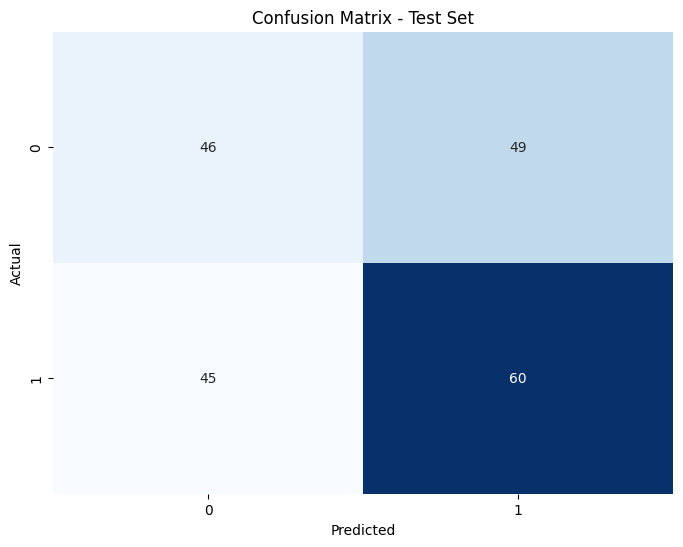


Confusion Matrix:
[[46 49]
 [45 60]]

Classification Report - Test Set:
              precision    recall  f1-score   support

    Loss (0)       0.51      0.48      0.49        95
     Win (1)       0.55      0.57      0.56       105

    accuracy                           0.53       200
   macro avg       0.53      0.53      0.53       200
weighted avg       0.53      0.53      0.53       200



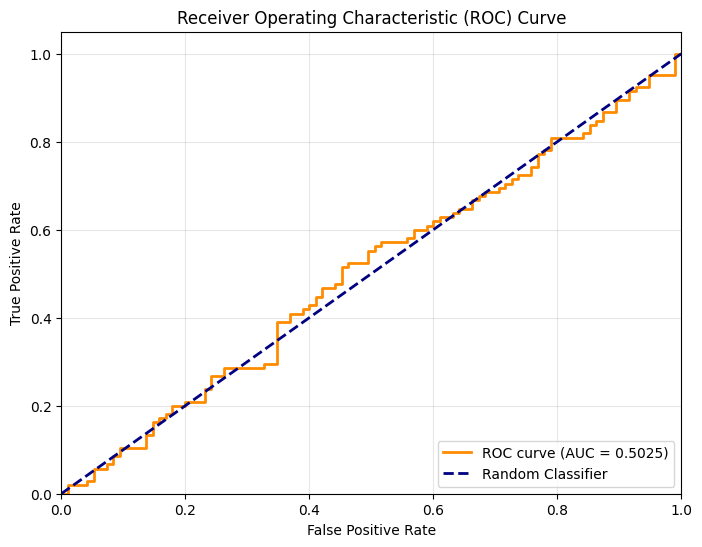


AUC Score: 0.5025


In [20]:
## Write your code here
! pip install seaborn
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

# Get predictions for visualization
model.eval()
with torch.no_grad():
    y_pred_train = model(X_train)
    y_pred_test = model(X_test)
    
    # Binary predictions (threshold = 0.5)
    y_pred_train_binary = (y_pred_train >= 0.5).float()
    y_pred_test_binary = (y_pred_test >= 0.5).float()

# Convert tensors to numpy for sklearn metrics
y_train_np = y_train.numpy()
y_test_np = y_test.numpy()
y_pred_train_np = y_pred_train_binary.numpy()
y_pred_test_np = y_pred_test_binary.numpy()
y_pred_test_proba = y_pred_test.numpy()

# 1. Confusion Matrix for Test Set
cm = confusion_matrix(y_test_np, y_pred_test_np)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - Test Set')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

print("\nConfusion Matrix:")
print(cm)

# 2. Classification Report
print("\nClassification Report - Test Set:")
print(classification_report(y_test_np, y_pred_test_np, target_names=['Loss (0)', 'Win (1)']))

# 3. ROC Curve and AUC
fpr, tpr, thresholds = roc_curve(y_test_np, y_pred_test_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Classifier')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(alpha=0.3)
plt.show()

print(f"\nAUC Score: {roc_auc:.4f}")


Double-click <b>here</b> for the Hint.
<!-- 

#Change the name of variables as per your code
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
import itertools

# Visualize the confusion matrix
#Change the variable names as used in your code
y_pred_test_labels = (y_pred_test > 0.5).float()
cm = confusion_matrix(y_test, y_pred_test_labels)

plt.figure(figsize=(6, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = range(2)
plt.xticks(tick_marks, ['Loss', 'Win'], rotation=45)
plt.yticks(tick_marks, ['Loss', 'Win'])

thresh = cm.max() / 2
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, cm[i, j], horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

# Print classification report
print("Classification Report:\n", classification_report(y_test, y_pred_test_labels, target_names=['Loss', 'Win']))

# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_test)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()
-->


### Step 6: Model Saving and Loading  

#### Task 6: Save and load the trained model.  

This task demonstrates the techniques to persist a trained model using `torch.save` and reload it using `torch.load`. Evaluating the loaded model ensures that it retains its performance, making it practical for deployment in real-world applications.  

1. Saving the Model:
- Save the model's learned weights and biases using torch.save().( e.g. , torch.save(model.state_dict(), 'your_model_name.pth'))
- Saving only the state dictionary (model parameters) is preferred because it’s more flexible and efficient than saving the entire model object.

2. Loading the Model:
- Create a new model instance (e.g., `model = LogisticRegressionModel()`) and load the saved parameters. ( e.g. , `model.load_state_dict(torch.load('your_model_name.pth'))`)`.

3. Evaluating the Loaded Model:
   - After loading, set the model to evaluation mode by calling `model.eval()
   - After loading the model, evaluate it again on the test dataset to make sure it performs similarly to when it was first trained..Now evaluate it on the test data.
   - Use `torch.no_grad()` to ensure that no gradients are computed.

#### Exercise 6:  

Write code to save the trained model and reload it. Ensure the loaded model performs consistently by evaluating it on the test dataset.  


In [21]:
## Write your code here
# Save the model
model_path = 'lol_match_predictor_model.pth'
torch.save(model.state_dict(), model_path)
print(f"Model saved to {model_path}")

# Load the model
loaded_model = LogisticRegressionModel(input_dim)
# Load the saved parameters
loaded_model.load_state_dict(torch.load(model_path))
print(f"Model loaded from {model_path}")

# Ensure the loaded model is in evaluation mode
loaded_model.eval()

# Evaluate the loaded model

with torch.no_grad():
    test_predictions_loaded = loaded_model(X_test)
    test_predictions_loaded = (test_predictions_loaded >= 0.5).float()
    
    test_accuracy_loaded = (test_predictions_loaded == y_test).float().mean()
    
    print(f"\nLoaded Model Test Accuracy: {test_accuracy_loaded.item():.4f}")
    print("Model loaded successfully and performs consistently!")




Model saved to lol_match_predictor_model.pth
Model loaded from lol_match_predictor_model.pth

Loaded Model Test Accuracy: 0.5300
Model loaded successfully and performs consistently!


### Step 7: Hyperparameter Tuning  

#### Task 7: Perform hyperparameter tuning to find the best learning rate.  

By testing different learning rates, you will identify the optimal rate that provides the best test accuracy. This fine-tuning is crucial for enhancing model performance . 
1. Define Learning Rates:
   - Choose these learning rates to test ,[0.01, 0.05, 0.1]

2. Reinitialize the Model for Each Learning Rate:
  - For each learning rate, you’ll need to reinitialize the model and optimizer e.g.(`torch.optim.SGD(model.parameters(), lr=lr)`).
   - Each new learning rate requires reinitializing the model since the optimizer and its parameters are linked to the learning rate.

3. Train the Model for Each Learning Rate:
  - Train the model for a fixed number of epochs (e.g., 50 or 100 epochs) for each learning rate, and compute the accuracy on the test set.
  - Track the test accuracy for each learning rate and identify which one yields the best performance.

4. Evaluate and Compare:
  - After training with each learning rate, compare the test accuracy for each configuration.
   - Report the learning rate that gives the highest test accuracy

#### Exercise 7:  

Perform hyperparameter tuning to find the best learning rate. Retrain the model for each learning rate and evaluate its performance to identify the optimal rate.  


In [22]:
## Write your code here

learning_rates = [0.01, 0.05, 0.1]
results = {}

print("Starting hyperparameter tuning...\n")

for lr in learning_rates:
    print(f"Training with learning rate: {lr}")
    
    # Reinitialize the model for each learning rate
    model_tuning = LogisticRegressionModel(input_dim)
    
    # Initialize optimizer with current learning rate
    optimizer_tuning = optim.SGD(model_tuning.parameters(), lr=lr, weight_decay=0.01)
    
    # Loss function
    criterion_tuning = nn.BCELoss()
    
    # Train for 100 epochs
    epochs_tuning = 100
    
    for epoch in range(epochs_tuning):
        model_tuning.train()
        optimizer_tuning.zero_grad()
        
        outputs = model_tuning(X_train)
        loss = criterion_tuning(outputs, y_train)
        
        loss.backward()
        optimizer_tuning.step()
    
    # Evaluate on test set
    model_tuning.eval()
    with torch.no_grad():
        test_predictions = model_tuning(X_test)
        test_predictions = (test_predictions >= 0.5).float()
        test_accuracy = (test_predictions == y_test).float().mean()
    
    results[lr] = test_accuracy.item()
    print(f"  Test Accuracy: {test_accuracy.item():.4f}\n")

# Find the best learning rate
best_lr = max(results, key=results.get)
best_accuracy = results[best_lr]

print("\n" + "="*50)
print("Hyperparameter Tuning Results:")
print("="*50)
for lr, acc in results.items():
    print(f"Learning Rate: {lr:5.2f} -> Test Accuracy: {acc:.4f}")
print("="*50)
print(f"\nBest Learning Rate: {best_lr}")
print(f"Best Test Accuracy: {best_accuracy:.4f}")

Starting hyperparameter tuning...

Training with learning rate: 0.01
  Test Accuracy: 0.4750

Training with learning rate: 0.05
  Test Accuracy: 0.5250

Training with learning rate: 0.1
  Test Accuracy: 0.4950


Hyperparameter Tuning Results:
Learning Rate:  0.01 -> Test Accuracy: 0.4750
Learning Rate:  0.05 -> Test Accuracy: 0.5250
Learning Rate:  0.10 -> Test Accuracy: 0.4950

Best Learning Rate: 0.05
Best Test Accuracy: 0.5250


### Step 8: Feature Importance  

#### Task 8: Evaluate feature importance to understand the impact of each feature on the prediction.  

The code to evaluate feature importance to understand the impact of each feature on the prediction.

 1.Extracting Model Weights:
  - The weights of the logistic regression model represent the importance of each feature in making predictions. These weights are stored in the model's linear layer (`model.linear.weight`).
 - You can extract the weights using `model.linear.weight.data.numpy()` and flatten the resulting tensor to get a 1D array of feature importances.

2.Creating a DataFrame:
 - Create a pandas DataFrame with two columns: one for the feature names and the other for their corresponding importance values (i.e., the learned weights).
 - Ensure the features are aligned with their names in your dataset (e.g., `X_train.columns).

3. Sorting and Plotting Feature Importance:
  - Sort the features based on the absolute value of their importance (weights) to identify the most impactful features.
  - Use a bar plot (via `matplotlib`) to visualize the sorted feature importances, with the feature names on the y-axis and importance values on the x-axis.

4. Interpreting the Results:
  - Larger absolute weights indicate more influential features. Positive weights suggest a positive correlation with the outcome (likely to predict the positive class), while negative weights suggest the opposite.

#### Exercise 8:  

Evaluate feature importance by extracting the weights of the linear layer and creating a DataFrame to display the importance of each feature. Visualize the feature importance using a bar plot.  



Top 10 Most Important Features:
        Feature  Importance
3   gold_earned    0.187618
0         kills    0.129843
5  wards_placed    0.108919
6  wards_killed   -0.051410
7  damage_dealt   -0.046726
1        deaths    0.017395
2       assists   -0.012818
4            cs   -0.008773


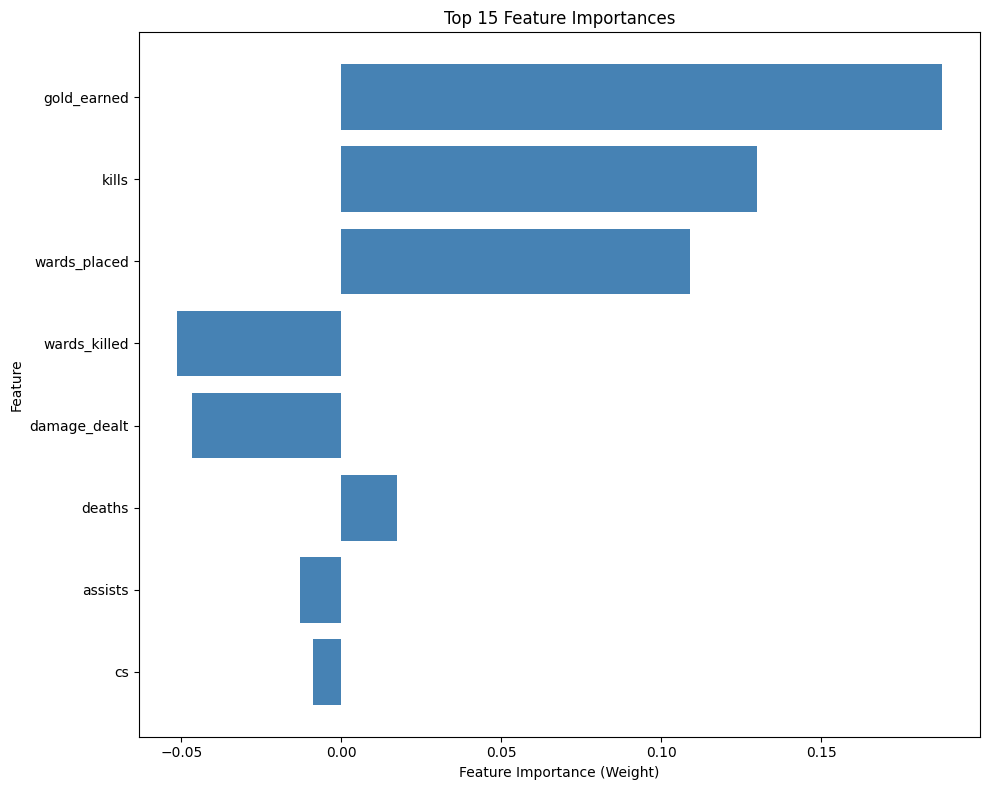


Interpretation:
- Positive weights indicate features that increase the probability of winning.
- Negative weights indicate features that decrease the probability of winning.
- Larger absolute values indicate more influential features.


In [23]:
## Write your code here

import pandas as pd
import matplotlib.pyplot as plt
# Extract the weights of the linear layer
feature_weights = model.linear.weight.data.numpy().flatten()

# Get feature names from the original dataset
feature_names = X.columns.tolist()

# Create a DataFrame for feature importance
feature_importance = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_weights
})

# Sort by absolute importance
feature_importance['Abs_Importance'] = feature_importance['Importance'].abs()
feature_importance = feature_importance.sort_values('Abs_Importance', ascending=False)

# Display top 10 most important features
print("\nTop 10 Most Important Features:")
print(feature_importance[['Feature', 'Importance']].head(10))

# Plot feature importance (top 15 features)
plt.figure(figsize=(10, 8))
top_features = feature_importance.head(15)
plt.barh(top_features['Feature'], top_features['Importance'], color='steelblue')
plt.xlabel('Feature Importance (Weight)')
plt.ylabel('Feature')
plt.title('Top 15 Feature Importances')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# Interpretation
print("\nInterpretation:")
print("- Positive weights indicate features that increase the probability of winning.")
print("- Negative weights indicate features that decrease the probability of winning.")
print("- Larger absolute values indicate more influential features.")





Double-click <b>here</b> for the Hint
<!-- 
#Use the following code to extract the weight and create dataframe
#Change the name of variables per your code

Extract the weights of the linear layer:
weights = model.linear.weight.data.numpy().flatten()
features = X.columns
Create a DataFrame for feature importance:
feature_importance = pd.DataFrame({'Feature': features, 'Importance': weights})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)
print(feature_importance)
Plot feature importance plt.figure(figsize=(10, 6))
plt.bar(feature_importance['Feature'], feature_importance['Importance'])
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.xticks(rotation=45)
plt.show()
-->


#### Conclusion:  

Congratulations on completing the project! In this final project, you built a logistic regression model to predict the outcomes of League of Legends matches based on various in-game statistics. This comprehensive project involved several key steps, including data loading and preprocessing, model implementation, training, optimization, evaluation, visualization, model saving and loading, hyperparameter tuning, and feature importance analysis. This project provided hands-on experience with the complete workflow of developing a machine learning model for binary classification tasks using PyTorch.

© Copyright IBM Corporation. All rights reserved.
